<a href="https://colab.research.google.com/github/TheLiss/mlcourse_notebooks/blob/main/mlcourse_demo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
df = pd.read_csv(DATA_PATH + "winequality-white.csv", sep=";")

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
y = df.pop('quality')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.7)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LinearRegression(n_jobs=-1)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
mean_squared_error(lr.predict(X_test), y_test)

0.5712893442808212

In [ ]:
mean_squared_error(lr.predict(X_train), y_train)

0.5608240380984415

In [ ]:
lr.coef_

array([ 0.03448962, -0.17769375,  0.00516541,  0.35929104, -0.01657463,
        0.07892193, -0.0201334 , -0.38416277,  0.09102992,  0.05614634,
        0.25774943])

In [ ]:
pd.Series(lr.coef_, index=df.columns).abs().sort_values(ascending=False)

,0
density,0.384163
residual sugar,0.359291
alcohol,0.257749
volatile acidity,0.177694
pH,0.091030
free sulfur dioxide,0.078922
sulphates,0.056146
fixed acidity,0.034490
total sulfur dioxide,0.020133
chlorides,0.016575


In [ ]:
X_train

array([[ 0.51302197, -0.48613185,  0.64193406, ..., -0.17380812,
         1.92064755, -0.9237196 ],
       [ 1.4402687 ,  0.00605906,  0.55825659, ...,  0.49459465,
        -0.43810591, -0.35763681],
       [-0.53013059, -1.17519912, -0.11116312, ...,  0.02671271,
        -0.70018963,  0.12757701],
       ...,
       [-0.06650723,  0.00605906,  0.22354674, ..., -1.10957199,
        -1.04963459,  0.6936598 ],
       [ 2.48342126, -0.38769367,  1.39503123, ...,  0.16039327,
        -1.31171831,  1.5023495 ],
       [-0.99375396, -1.07676093, -0.36219551, ..., -0.30748867,
        -1.31171831,  1.42148053]])

In [ ]:
lasso = Lasso(alpha=0.01)

In [ ]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
mean_squared_error(lasso.predict(X_test), y_test)

0.5797105601944117

In [ ]:
pd.Series(lasso.coef_, index=df.columns).abs().sort_values(ascending=False)

,0
alcohol,0.364625
volatile acidity,0.177268
residual sugar,0.172470
density,0.126595
free sulfur dioxide,0.067677
pH,0.037079
sulphates,0.029568
chlorides,0.021569
fixed acidity,0.019227
total sulfur dioxide,0.005313


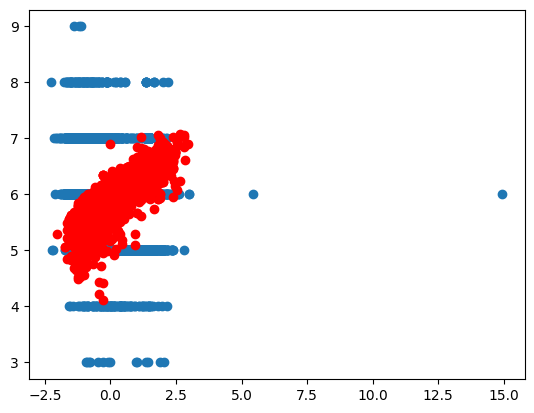

In [ ]:
plt.scatter(pd.DataFrame(X_train.T, index=df.columns).T['density'], y_train)
plt.scatter(pd.DataFrame(X_train.T, index=df.columns).T['alcohol'], lasso.predict(X_train), color='red')


In [ ]:
lassocv = LassoCV(cv=5, alphas=np.logspace(-6,2,200))

In [ ]:
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5)

In [ ]:
lassocv.alpha_

0.00499450511585514

In [ ]:
mean_squared_train = mean_squared_error(lassocv.predict(X_train), y_train)
mean_squared_test = mean_squared_error(lassocv.predict(X_test), y_test)

In [ ]:
pd.Series(lassocv.coef_, index=df.columns).abs().sort_values(ascending=False)

,0
alcohol,0.319701
residual sugar,0.254122
density,0.236867
volatile acidity,0.178603
free sulfur dioxide,0.073326
pH,0.058917
sulphates,0.042027
chlorides,0.019629
total sulfur dioxide,0.012623
fixed acidity,0.000000


In [ ]:
mean_squared_train, mean_squared_test

(0.5620005593586901, 0.5752691102595204)

In [ ]:
forest = RandomForestRegressor(n_jobs=-1)

In [ ]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
mean_squared_error(forest.predict(X_test), y_test)

0.40559823129251704

In [ ]:
forest_params = {'max_depth': list(range(10, 25)),
  'min_samples_leaf': list(range(1, 8)),
  'max_features': list(range(6,12))}

In [ ]:
forest_grid = GridSearchCV(forest, param_grid=forest_params, n_jobs=-1)

In [ ]:
forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]})